In [1]:
import pandas as pd 

In [2]:
bike=pd.read_csv("C:/Users/91944/Desktop/Book bike.csv")

In [3]:
bike.head(3)

,Bike_name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Owner
0,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,0
1,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,0
2,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,0


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bike_name      96 non-null     object 
 1   Year           96 non-null     int64  
 2   Selling_Price  96 non-null     float64
 3   Present_Price  96 non-null     float64
 4   Kms_Driven     96 non-null     int64  
 5   Fuel_Type      96 non-null     object 
 6   Seller_Type    96 non-null     object 
 7   Owner          96 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 6.1+ KB


In [8]:
print(bike['Seller_Type'].unique())
print(bike['Fuel_Type'].unique())
print(bike['Owner'].unique())


['Individual']
['Petrol']
[0 1]


In [9]:
bike.isnull().sum()

Bike_name        0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Owner            0
dtype: int64

In [15]:
bike_dataset=bike[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Owner']]


In [16]:
bike_dataset.head(1)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Owner
0,2016,1.75,1.9,3000,Petrol,Individual,0


In [22]:
bike_dataset['Current_year']=2021

In [23]:
#how many years the has been used 

In [ ]:
bike_dataset['Used_Years']=bike_dataset['Current_year']-bike_dataset['Year']

In [32]:
bike_dataset.head(1)

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_year,Used_Years
0,1.75,1.9,3000,0,2021,5


In [26]:
# Here we are going to drop Years fron the dataset

In [27]:
bike_dataset.drop(['Year'],axis=1,inplace=True)

In [28]:
#Get dummies of this data set 

In [29]:
bike_dataset=pd.get_dummies(bike_dataset,drop_first=True)

In [31]:
bike_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_year,Used_Years
0,1.75,1.90,3000,0,2021,5
1,1.65,1.78,4000,0,2021,4
2,1.45,1.60,1200,0,2021,4
3,1.35,1.47,4100,0,2021,4
4,1.35,2.37,21700,0,2021,6


In [34]:
bike_dataset=bike_dataset.drop(['Current_year'],axis=1)

In [36]:
x=bike_dataset.iloc[:,1:]
y=bike_dataset.iloc[: ,0]

In [37]:
x

,Present_Price,Kms_Driven,Owner,Used_Years
0,1.90,3000,0,5
1,1.78,4000,0,4
2,1.60,1200,0,4
3,1.47,4100,0,4
4,2.37,21700,0,6
...,...,...,...,...
91,0.32,35000,0,6
92,0.51,33000,0,11
93,0.57,35000,1,10
94,0.58,53000,0,14


In [38]:
y

0     1.75
1     1.65
2     1.45
3     1.35
4     1.35
      ... 
91    0.18
92    0.16
93    0.15
94    0.12
95    0.10
Name: Selling_Price, Length: 96, dtype: float64

In [39]:
x['Owner'].unique()

array([0, 1], dtype=int64)

In [40]:
# now we are going to extract the regressor

In [41]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
import matplotlib.pyplot as plt
model.fit(x,y)

ExtraTreesRegressor()

In [42]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [44]:
bike_dataset.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,Used_Years
0,1.75,1.90,3000,0,5
1,1.65,1.78,4000,0,4
2,1.45,1.60,1200,0,4


In [51]:
bike_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Used_Years
Selling_Price,1.000000,0.826694,-0.382721,-0.172589,-0.488055
Present_Price,0.826694,1.000000,-0.149422,0.062499,-0.132745
Kms_Driven,-0.382721,-0.149422,1.000000,0.048774,0.520116
Owner,-0.172589,0.062499,0.048774,1.000000,0.266273
Used_Years,-0.488055,-0.132745,0.520116,0.266273,1.000000


In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
regressor= RandomForestRegressor()

In [56]:
import numpy as np

In [57]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [60]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [61]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [62]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [63]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [64]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [65]:
rf_random.best_score_

-0.013767754394395412

In [66]:
predictions=rf_random.predict(x_test)

In [67]:
predictions

array([0.52415, 0.66879, 0.50682, 1.07867, 1.17324, 0.33961, 1.31919,
       0.71133, 0.37245, 1.1591 , 0.48624, 0.19942, 0.45421, 1.1605 ,
       1.26934, 0.77951, 1.34547, 0.69922, 0.43475, 0.39388, 1.1928 ,
       0.2687 , 0.58134, 0.63346, 1.1543 , 0.48885, 0.57543, 0.23664,
       0.31931])

In [68]:
from sklearn import metrics

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.10881655172413741
MSE: 0.020836389151723894
RMSE: 0.14434815257468275


In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()

In [72]:
lr.fit(x_train, y_train)

LinearRegression()

In [74]:
lr.score(x_test, y_test)

0.7154087783435004

In [76]:
bike_dataset.head(1)

,Selling_Price,Present_Price,Kms_Driven,Owner,Used_Years
0,1.75,1.9,3000,0,5


In [75]:
data = bike_dataset.copy()

In [ ]:
data['Predicted price'] = lr.predict(data.drop(['Selling_Price'], axis=1))

In [86]:
data['Difference'] = data['Selling_Price'] - data['Predicted price']

In [87]:
data[['Selling_Price', 'Predicted price', 'Difference']].head(20)

,Selling_Price,Predicted price,Difference
0,1.75,1.372853,0.377147
1,1.65,1.325997,0.324003
2,1.45,1.207252,0.242748
3,1.35,1.115533,0.234467
4,1.35,1.633345,-0.283345
5,1.35,2.204866,-0.854866
6,1.25,0.979584,0.270416
7,1.20,1.083285,0.116715
8,1.20,1.107181,0.092819
9,1.20,1.287798,-0.087798


In [92]:
from statsmodels.formula.api import ols

In [93]:
for i in x_train.columns:
    print(i,end='+')

Present_Price+Kms_Driven+Owner+Used_Years+

In [94]:
lm=ols('Selling_Price~Present_Price+Kms_Driven+Owner+Used_Years',data=bike_dataset).fit()

In [95]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     131.7
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           5.68e-37
Time:                        18:36:27   Log-Likelihood:                 49.528
No. Observations:                  96   AIC:                            -89.06
Df Residuals:                      91   BIC:                            -76.23
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3993      0.056      7.111      0.000       0.288       0.511
Present_Price     0.5790      0.030     19.059      0.000       0.519       0.639
Kms_Driven    -1.554e-06   6.86e-07     -2.264      0.026   -2.92e-06   -1.91e-07
Owner            -0.2153      0.066     -3.284      0.001      -0.346      -0.085
Used_Years       -0.0391      0.007     -5.914      0.000      -0.052      -0.026
==============================================================================
Omnibus:                        7.604   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.022   Jarque-Bera (JB):               14.092
Skew:                           0.132   Prob(JB):                     0.000871
Kurtosis:                       4.858   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

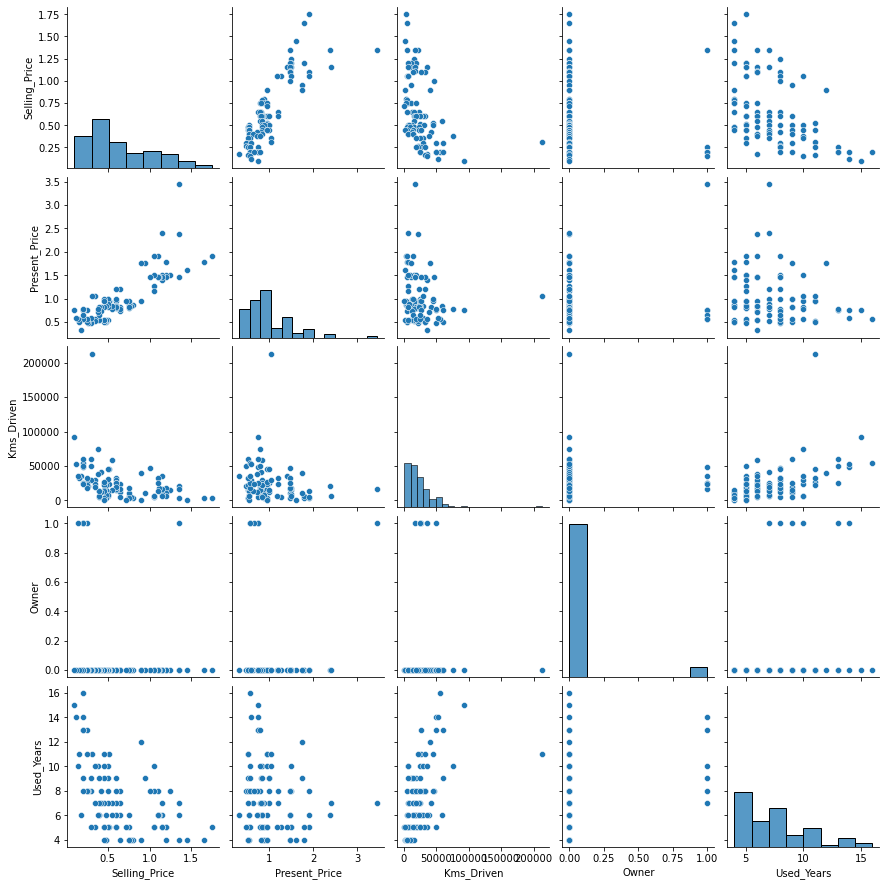

In [104]:
sns.pairplot(bike_dataset)

In [105]:
bike_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Used_Years
0,1.75,1.90,3000,0,5
1,1.65,1.78,4000,0,4
2,1.45,1.60,1200,0,4
3,1.35,1.47,4100,0,4
4,1.35,2.37,21700,0,6


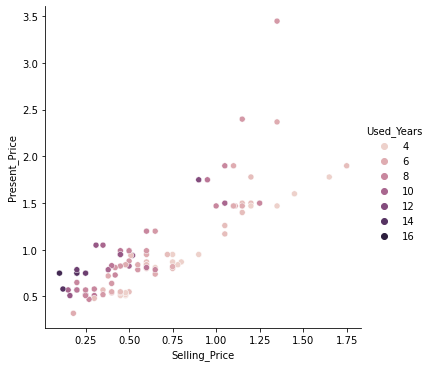

In [112]:
sns.relplot(x='Selling_Price',y='Present_Price', hue='Used_Years',data=bike_dataset)

D:\Abijith\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

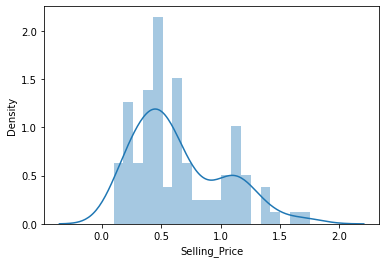

In [114]:
sns.distplot(bike_dataset['Selling_Price'],bins=20)

In [115]:
bike_dataset.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,Used_Years
0,1.75,1.90,3000,0,5
1,1.65,1.78,4000,0,4


In [117]:
x=data['Present_Price'].values
y=data['Selling_Price'].values

In [118]:
# Mean X and Y 
mean_x = np.mean(x)
mean_y = np.mean(y)

# Total number of values 
m=len(x)

#using the formula to calculate b1 and b2 

numer=0
denom=0 

for i in range(m):
    numer+=(x[i]-mean_x)*(y[i]-mean_y)
    denom+=(x[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)

#print coefficients 
print(b1,b0)

0.6132127459116191 0.02969703911655175


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
sns.set_theme(color_codes=True)

In [125]:
data[['Selling_Price', 'Predicted price', 'Difference']].head(5)

,Selling_Price,Predicted price,Difference
0,1.75,1.372853,0.377147
1,1.65,1.325997,0.324003
2,1.45,1.207252,0.242748
3,1.35,1.115533,0.234467
4,1.35,1.633345,-0.283345


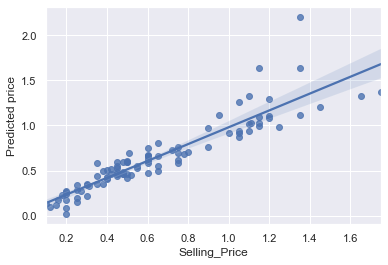

In [127]:
sns.regplot(x="Selling_Price", y="Predicted price", data=data);